# Linear Regression Example
Adam Haile - 2/19/2024

## Data Import

In [29]:
# Run if you don't have the packages installed
# %pip install numpy matplotlib scikit-learn pandas

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

## Get Sample Data
For this example, we are going to use the Bostom Housing Dataset. This dataset contains some feature information about houses in the Bostom area including age of house, tax price, and others. If you want to learn more about the features, check out https://lib.stat.cmu.edu/datasets/boston

In [31]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Training/Testing Splits

Spliting our data is important so we can compare our final model and make sure it is generalizing appropriately to the learned data points.

In [32]:
X = df[['RM']].values # Independent Variable, feel free to try out others, for our example we will use rm (average number of rooms per dwelling)
y = df['MEDV'].values # Dependent Variable, we want to predict the median value of owner-occupied homes in $1000's

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualizing our Data

Let's see how our variables look plotted against each other and see if we can spot a trend already.

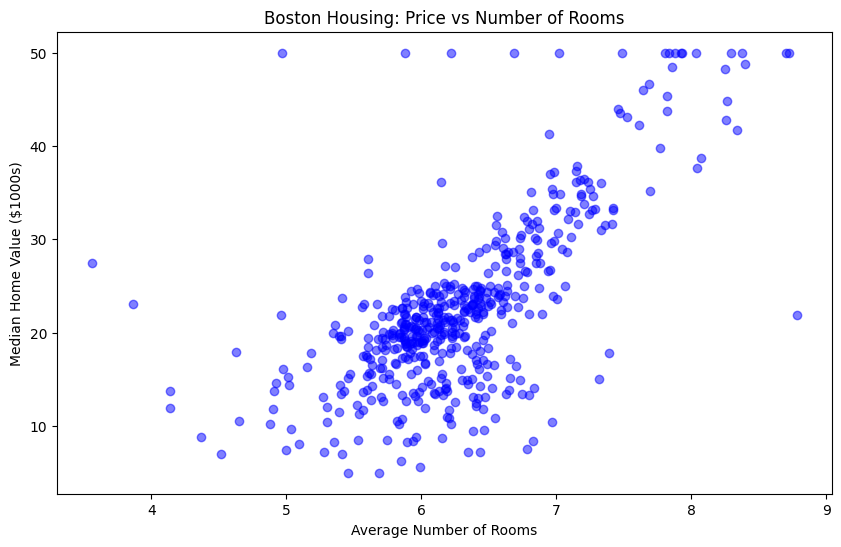

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value ($1000s)')
plt.title('Boston Housing: Price vs Number of Rooms')
plt.show()

So we can see there is a pretty generally linear trend, but there are definetly points that fall outside our linear points. Let's see what a model thinks is the most optimal line?

## Training a Linear Regression Model

For this, we are going to use a library called SKLearn which has a bunch of ML models predefined and ready for us to provide our data to and get a trained model. You should be able to run this locally without issues or time delays.

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Great! We have a model! Let's test it.

## Evaluating our Linear Regression Model

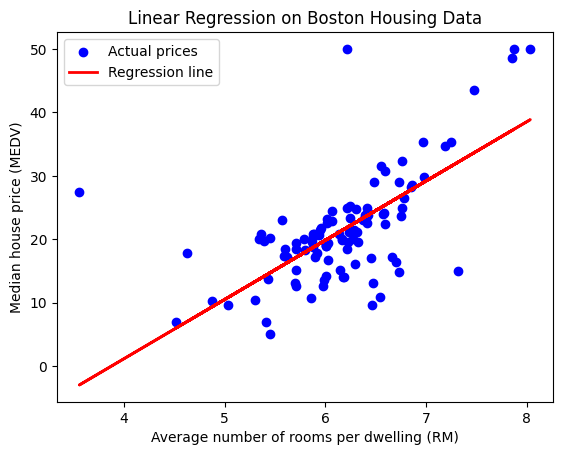

Intercept: -36.25
Coefficient: 9.35


In [35]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color="blue", label="Actual prices")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Median house price (MEDV)")
plt.legend()
plt.title("Linear Regression on Boston Housing Data")
plt.show()

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

So, we can see our trained model got a regression line of y = 9.35x - 36.25, let's look at how well it's performing with this example.

## Calculating Error of Linear Regression

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 46.14
Root Mean Squared Error (RMSE): 6.79
Mean Absolute Error (MAE): 4.48
R² Score: 0.37


How do we interpret these results?
- Mean Squared Error (MSE) is going to be the average squared differences between the acutal values ($y_i$) and the predicted values ($\hat{y_i}$). Squaring helps to ensure the errors are positive and penalizes large errors more than smaller errors. For MSE, lower = better fit.
  * $MSE = \frac{1}{n}\sum^n_{i=1}{(y_i - \hat{y_i})^2}$

- Root Mean Squared Error (RMSE) is just applying a square root to MSE which will bring the error back to the same unit as the target variable. It makes it more interpretable than MSE because it is directly related to the dataset's scale. Same as MSE, lower = better model performance.
  * $RMSE = \sqrt{MSE}$

- MAE is the same as MSE, but applying an absolute value instead of a squaring of the predicted and actual values. It doesn't penalize larger errors as much, however it is **more robust to outliers than MSE/RMSE**.
  * $MSE = \frac{1}{n}\sum^n_{i=1}{|y_i - \hat{y_i}|}$

- $R^2$ measures how well the model explains variability in the target variable. This is a standard statistical value which ranges from 0 to 1, where $R^2$ = 1 means the model is completely perfect, 100% of variance is explained in the model. An $R^2$ = 0 means the model is no better than predicting the mean of y. A negative $R^2$ means it is worse than predicting the mean.
  * $R^2 = 1 - \frac{\sum{(y_i - \hat{y_i})^2}}{\sum(y_i - \bar{y})^2}$ ($\bar{y}$ = Average of y)


So understanding this, we can see the model isn't perfect for this dataset, but it is better than predicting the mean/random chance. Let's try it out on another dataset. This time, I want you to fill in where it says `TODO`.

In [37]:
## Import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

This time, we are going to look at the IRIS dataset. This dataset contains data on iris flowers. You can learn more about it at https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html. 

In [40]:
iris = datasets.load_iris()
X = ... # TODO: Fill in the feature for Sepal Length (cm)
y = ... # TODO: Fill in the target for Petal Length (cm)

If you think you have the above section filled in correctly, you can continue on with the next cells. If you need some help, you can reveal the answer.
<p>
<details>
<summary>Click here to reveal the answer</summary>

<pre><code>
X = iris.data[:, 0].reshape(-1, 1)
y = iris.data[:, 2]
</code></pre>

</details>
</p>

In [41]:
# Let's create our train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = LinearRegression()
model.fit(..., ...) # TODO: Fill in the feature and target for training

LinearRegression()

If you think you have the above section filled in correctly, you can continue on with the next cells. If you need some help, you can reveal the answer.
<p>
<details>
<summary>Click here to reveal the answer</summary>

<pre><code>
model.fit(X_train, y_train)
</code></pre>

</details>
</p>

In [43]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(..., ...) # TODO: Fill in the target and predicted values
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.5961


If you think you have the above section filled in correctly, you can continue on with the next cells. If you need some help, you can reveal the answer.
<p>
<details>
<summary>Click here to reveal the answer</summary>

<pre><code>
mse = mean_squared_error(y_test, y_pred)
</code></pre>

</details>
</p>

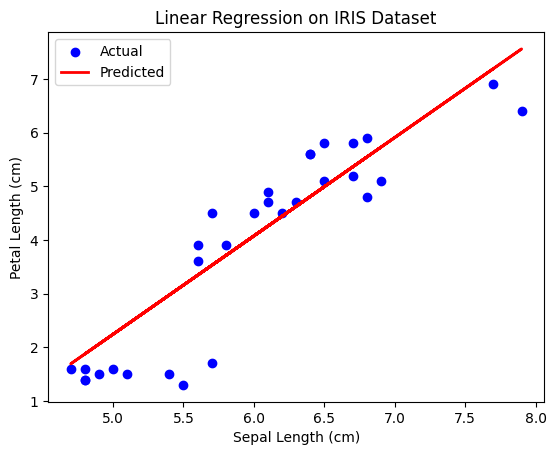

In [45]:
plt.scatter(..., ..., color='blue', label='Actual') # TODO: Fill in the necessary values to plot the actual testing points 
plt.plot(..., ..., color='red', linewidth=2, label='Predicted') # TODO: Fill in the necessary values to plot the predicted linear regression line
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Linear Regression on IRIS Dataset')
plt.legend()
plt.show()

If you think you have the above section filled in correctly, you can continue on with the next cells. If you need some help, you can reveal the answer.
<p>
<details>
<summary>Click here to reveal the answer</summary>

<pre><code>
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
</code></pre>

</details>
</p>

You should now have trained two different Linear Regression models! I would encourage you now to look into making your own linear regression from scratch, not using SKLearn. As always, the internet is a bountiful place to find plenty of information on how to do so.
- https://en.wikipedia.org/wiki/Linear_regression
- https://www.geeksforgeeks.org/ml-linear-regression/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html